In [6]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load customer data and prepare features
df = pd.read_csv("Mall_Customers.csv")

gender_mapping = {'Male': 0, 'Female': 1}

# Apply label encoding to the 'gender' column
df['Gender'] = df['Gender'].map(gender_mapping)

def get_best_cluster(data,n_cluster):
    acc={}
    for k in range(1,n_cluster):
        model=KMeans(n_clusters=k,n_init=15)
        model.fit(data)
        acc[k]=model.inertia_
    plt.plot(acc.keys(),acc.values(),marker=".")
    plt.xlabel("Count of Clusters")
    plt.ylabel("Error")
    plt.title("Find the best numbers of Clustering for Kmeans")
    return acc

{1: 975512.0600000003,
 2: 387065.71377137717,
 3: 271384.508782868,
 4: 195401.19855991466,
 5: 157505.72072477575,
 6: 122630.44175335608,
 7: 103203.14214665974,
 8: 86146.21762410295,
 9: 76894.30157649369,
 10: 69413.05871863791,
 11: 64441.40454396671}

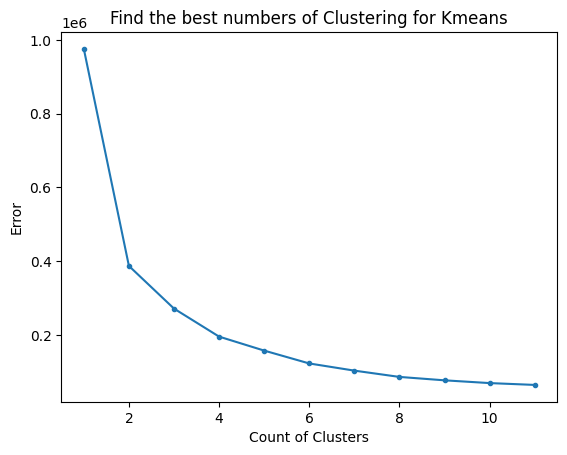

In [7]:
acc_df=get_best_cluster(df,12)
acc_df

In [8]:
def train_plot(data,n_clusters):
    data=data.copy()
    model=KMeans(n_clusters=n_clusters,n_init=50)
    pre=model.fit_predict(data)
    data['Group']=pre
    for k in range(n_clusters):
        plt.scatter(data[data['Group']==k]["Annual Income (k$)"],data[data['Group']==k]["Spending Score (1-100)"],
                    label=f"Group {k+1}")
    plt.title("Customer Groups")
    plt.xlabel("Annual Income")
    plt.ylabel("Spending Score")
    plt.legend()
    return pre

array([2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

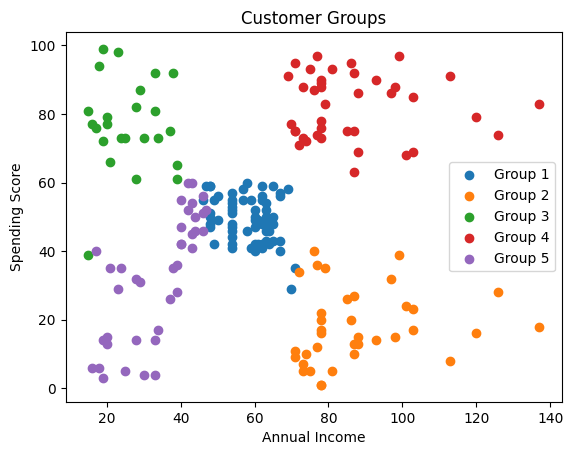

In [9]:
Groups=train_plot(df,5)
Groups